# Data Generation and Statistical Test


In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import Util.data_check

## Data Preparation

In [2]:
# set random seed for reproducibility
np.random.seed(42)

# Beispiel Daten laden
data = pd.read_csv('./../Data/preprocessed_df_v2.csv') # Pfad zu Ihren Daten

# Daten skalieren
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Dimension der Eingabedaten
input_dim = data_scaled.shape[1]

print(data_scaled[:5])

[[0.         0.         0.0030929  0.05263158 0.         0.10526316
  0.26315789 0.21052632 0.05263158 0.135      0.7440808  0.74566782
  0.06277255 0.53601451 0.15244447 0.0270285  0.48987881 0.32269304
  0.14196099 0.16092518 0.19536516 0.1978343 ]
 [0.         0.33333333 0.00238009 0.47368421 0.26315789 0.21052632
  0.52631579 0.10526316 0.21052632 0.35375    0.70649122 0.71014102
  0.         0.31792393 0.0970566  0.         0.26586926 0.1913975
  0.05428654 0.09220001 0.12609022 0.13874713]
 [0.         0.66666667 0.00831226 1.         0.05263158 0.73684211
  0.84210526 0.89473684 0.15789474 0.72875    0.77876653 0.78222397
  0.20698158 0.35502628 0.27968847 0.08912179 0.30397857 0.21373397
  0.22286247 0.22434125 0.26664727 0.25863346]
 [0.         1.         0.00371728 0.57894737 0.10526316 0.42105263
  0.52631579 0.15789474 0.21052632 0.395      0.82198233 0.8251407
  0.05533873 0.52209791 0.14588518 0.02382766 0.47558452 0.31431493
  0.32365963 0.30335288 0.35033209 0.33001136

In [3]:

# Berechnen Sie den Mittelwert und die Standardabweichung für jede Eigenschaft der skalierten Daten
means = np.mean(data_scaled, axis=0)
stds = np.std(data_scaled, axis=0)

# Anzahl der zu generierenden Datenpunkte
num_additional_points = 1000

# Generieren Sie zusätzliche skalierten Datenpunkte basierend auf den Mittelwerten und Standardabweichungen
synthetic_data_scaled = np.random.normal(loc=means, scale=stds, size=(num_additional_points, data_scaled.shape[1]))

# Die generierten Daten zurückskalieren auf den ursprünglichen Wertebereich
synthetic_data = scaler.inverse_transform(synthetic_data_scaled)

# Die generierten Daten mit den Originaldaten kombinieren
augmented_data = np.vstack((data, synthetic_data))

# Optional: Konvertieren Sie die Daten in ein TensorFlow-Dataset
dataset = tf.data.Dataset.from_tensor_slices(augmented_data)

print("Original Data Shape:", data.shape)
print("Synthetic Data Shape:", synthetic_data.shape)
print("Augmented Data Shape:", augmented_data.shape)

Original Data Shape: (188, 22)
Synthetic Data Shape: (1000, 22)
Augmented Data Shape: (1188, 22)


2024-06-24 09:11:34.954067: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-06-24 09:11:34.954085: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-06-24 09:11:34.954091: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-06-24 09:11:34.954106: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-24 09:11:34.954116: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# Konvertiere die augmented_data in ein DataFrame
augmented_data = pd.DataFrame(augmented_data, columns=data.columns)
# Ausgabe der ersten 5 Zeilen
print(augmented_data[:5])

   participant_id  test_id  test_duration  mental  physical  temporal  \
0             1.0      1.0      33.643950    10.0       5.0      15.0   
1             1.0      2.0      28.484322    50.0      30.0      25.0   
2             1.0      3.0      71.423823   100.0      10.0      75.0   
3             1.0      4.0      38.163442    60.0      15.0      45.0   
4             2.0      1.0      41.748047    20.0      10.0      20.0   

   performance  effort  frustration  mean  ...  blinkrate  fixationrate  \
0         25.0    25.0         10.0  15.0  ...   0.059446      0.295946   
1         50.0    15.0         25.0  32.5  ...   0.000000      0.175533   
2         80.0    90.0         20.0  62.5  ...   0.196013      0.196018   
3         50.0    20.0         25.0  35.8  ...   0.052406      0.288263   
4         10.0    20.0         15.0  15.8  ...   0.047906      0.143727   

   blinkrate_rel  blinkrate_rel_pct  fixationrate_rel  fixationrate_rel_pct  \
0       0.000000           0.00

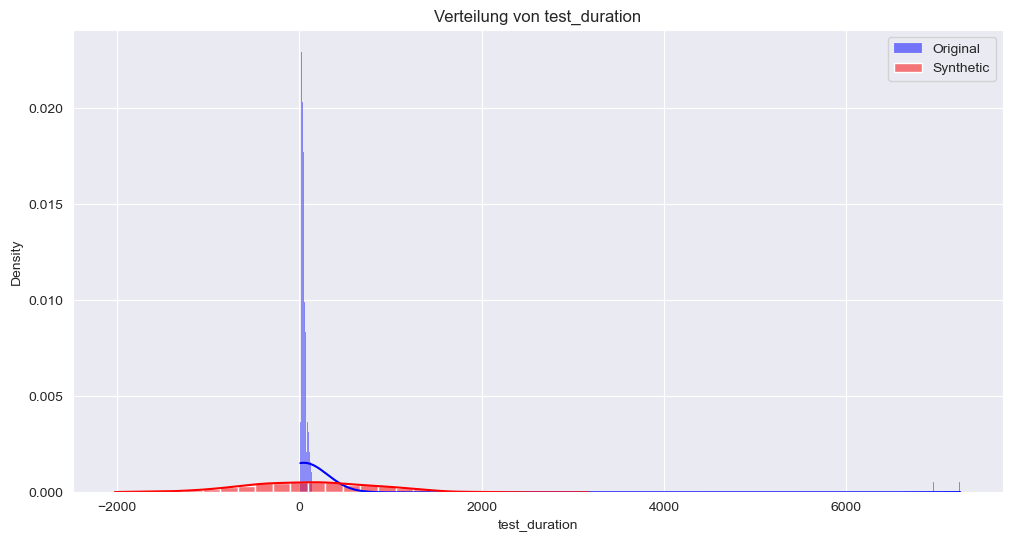

Normalitätstest für test_duration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für test_duration:
Statistik = 1.6021528601112625, p-Wert = 0.20559838572874695
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



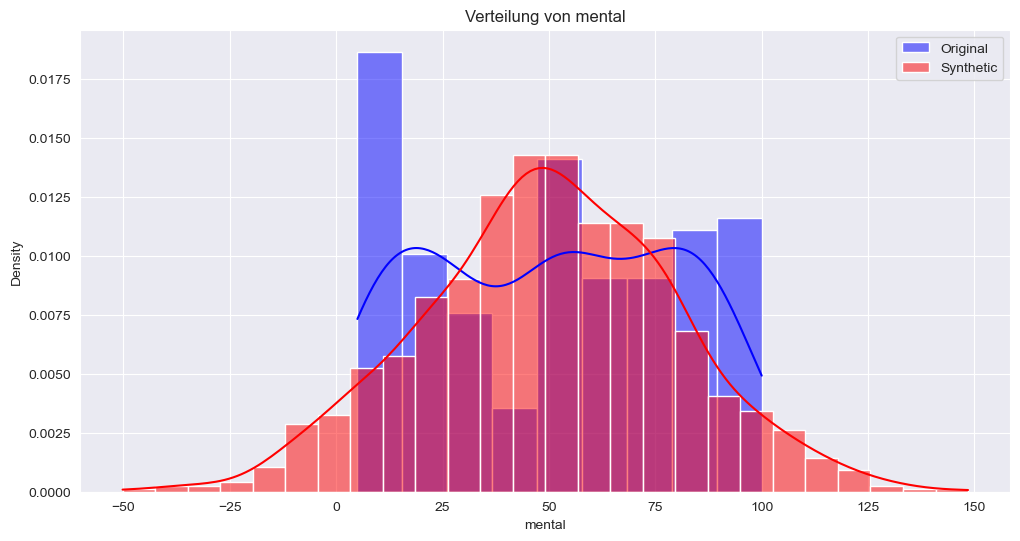

Normalitätstest für mental:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mental:
Statistik = 0.013367506600427546, p-Wert = 0.907955349163881
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



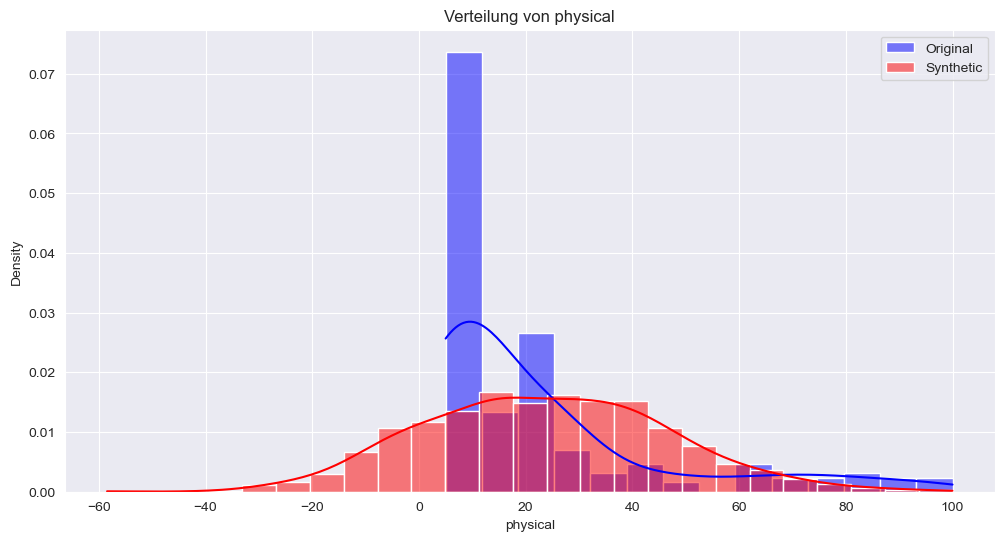

Normalitätstest für physical:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für physical:
Statistik = 5.593699854775333, p-Wert = 0.01802518411952523
Die Verteilungen sind signifikant unterschiedlich (Nullhypothese verworfen).



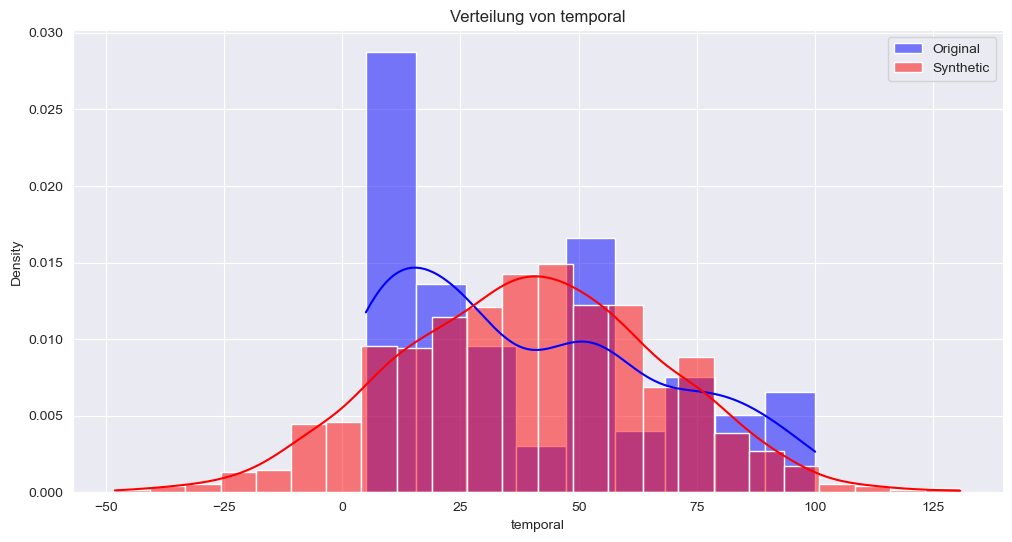

Normalitätstest für temporal:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für temporal:
Statistik = 1.003286888023835, p-Wert = 0.3165164821238029
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



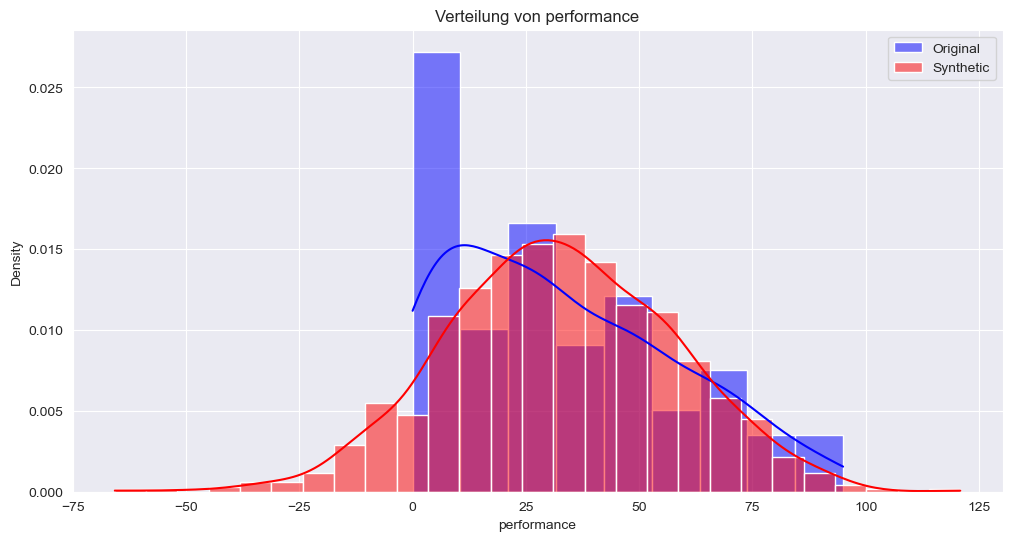

Normalitätstest für performance:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für performance:
Statistik = 0.8011262963548352, p-Wert = 0.37075683864733466
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



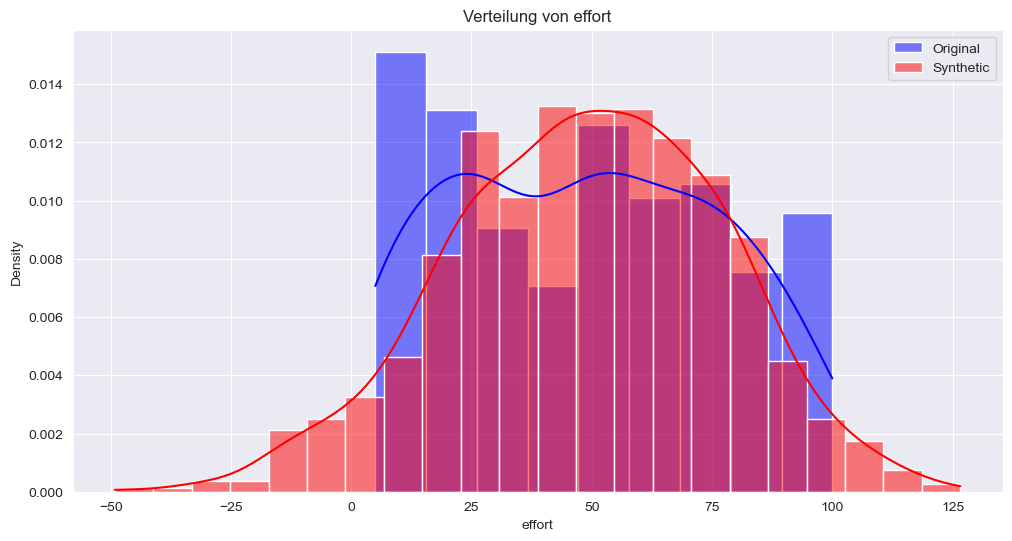

Normalitätstest für effort:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für effort:
Statistik = 0.20940264012370657, p-Wert = 0.6472360118949436
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



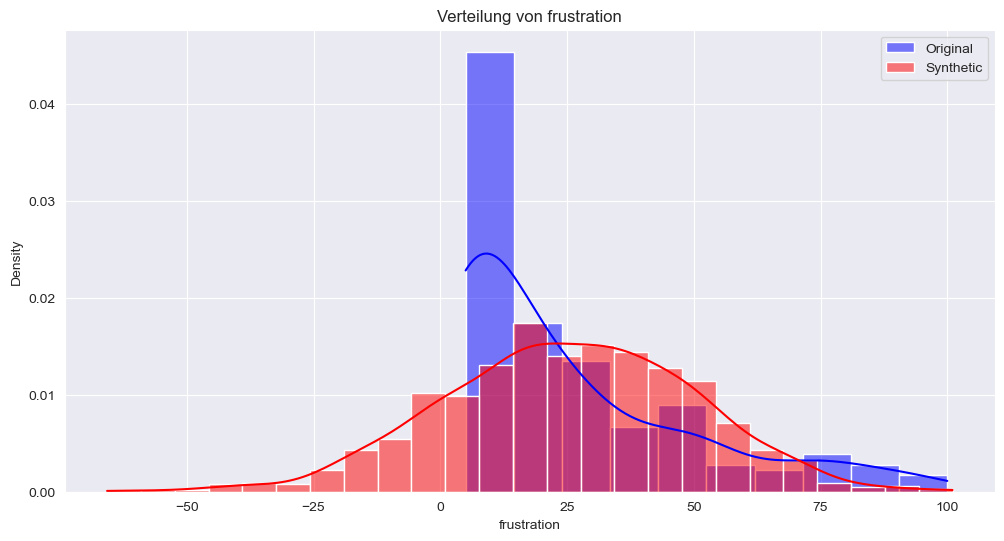

Normalitätstest für frustration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für frustration:
Statistik = 3.0120878419123684, p-Wert = 0.08264577643534124
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



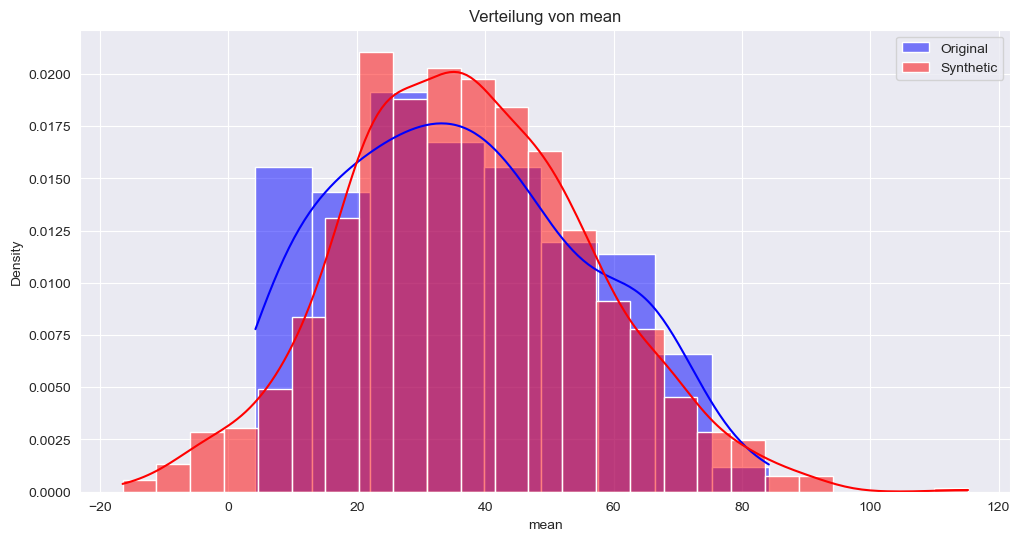

Normalitätstest für mean:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für mean:
Statistik = 0.8232418146473002, p-Wert = 0.36423403724139614
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



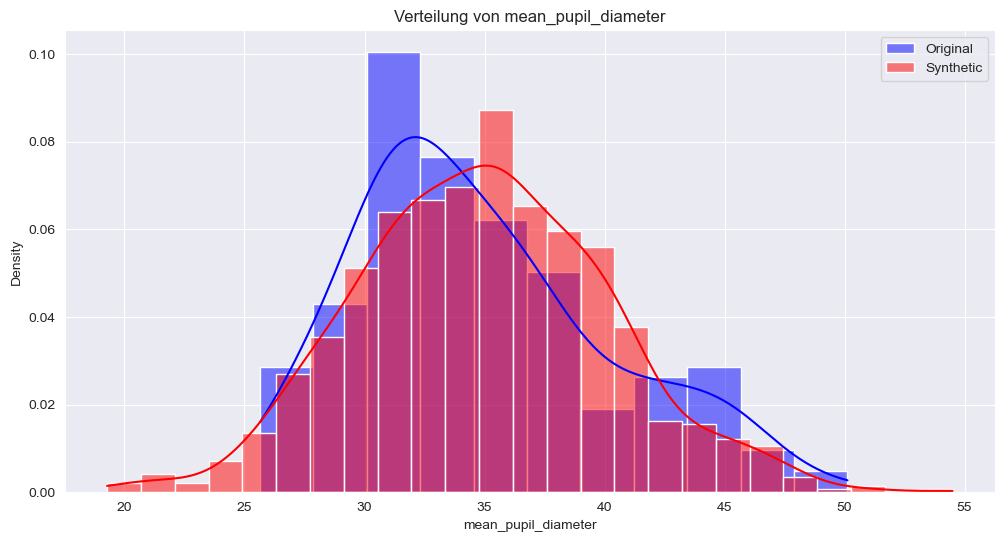

Normalitätstest für mean_pupil_diameter:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mean_pupil_diameter:
Statistik = 1.0914454104655877, p-Wert = 0.29615117443431765
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



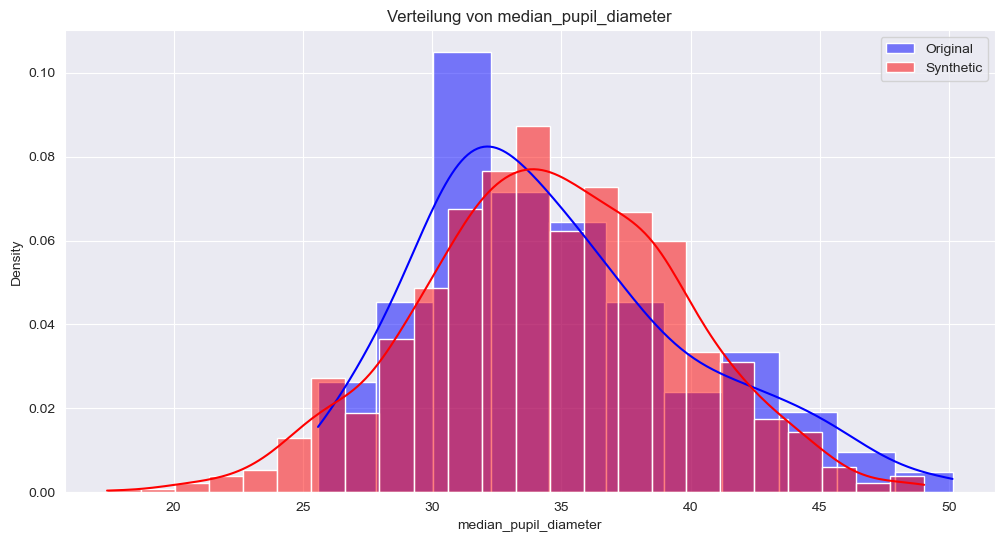

Normalitätstest für median_pupil_diameter:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für median_pupil_diameter:
Statistik = 0.3490775419936114, p-Wert = 0.5546357761930953
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



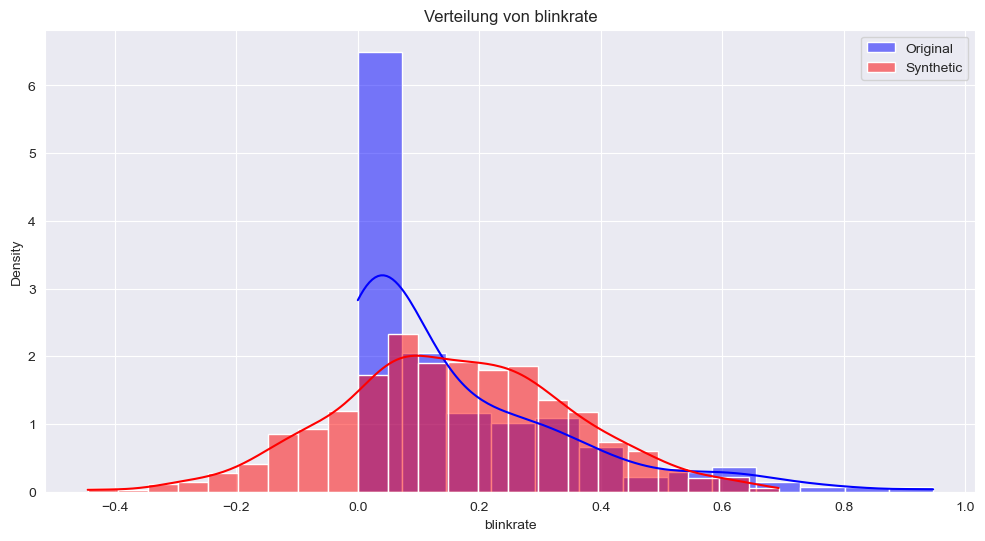

Normalitätstest für blinkrate:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für blinkrate:
Statistik = 2.32368189756341, p-Wert = 0.1274181113830915
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



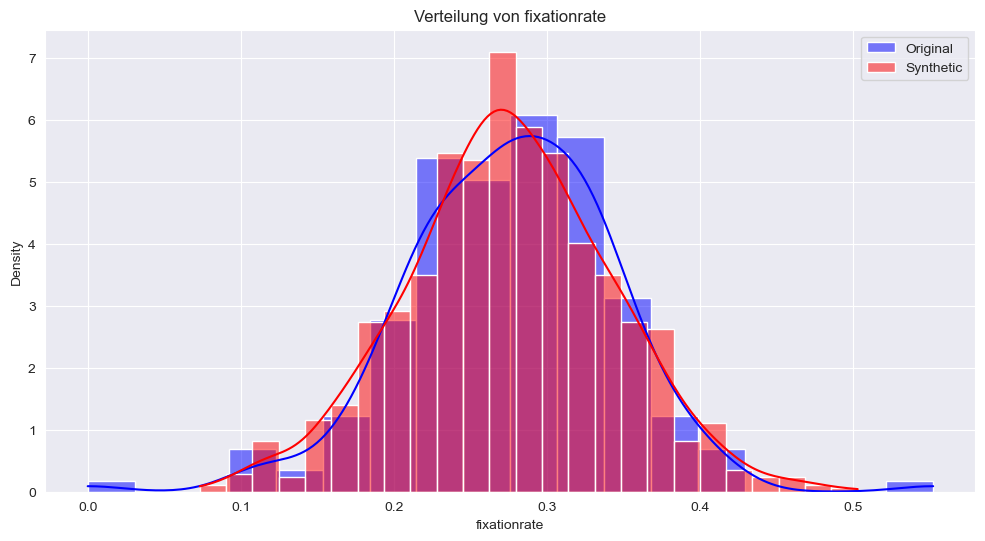

Normalitätstest für fixationrate:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für fixationrate:
Statistik = 0.22914067217727263, p-Wert = 0.6321617404021018
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



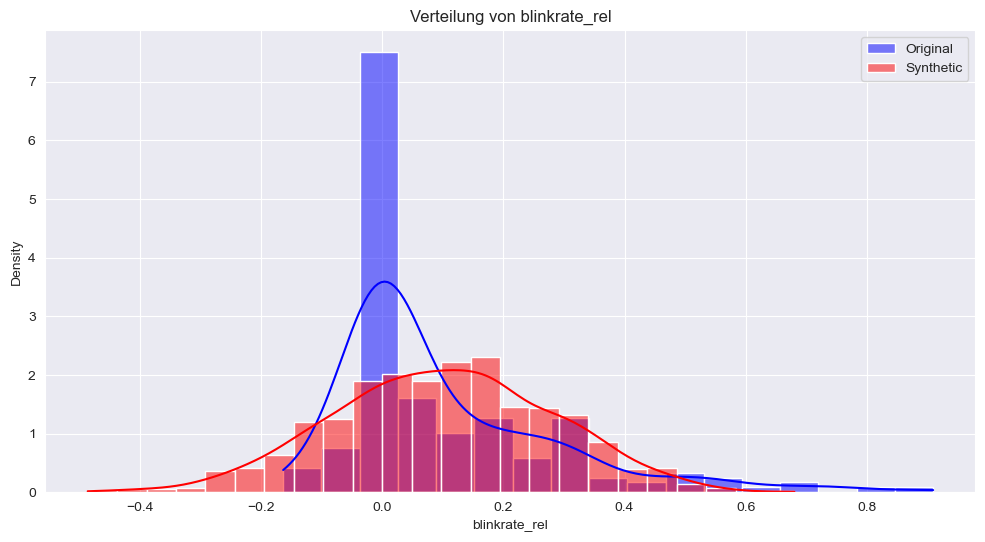

Normalitätstest für blinkrate_rel:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für blinkrate_rel:
Statistik = 2.5784337243306146, p-Wert = 0.10832880524209969
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



/Users/hennerbendig/anaconda3/envs/tf_311/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


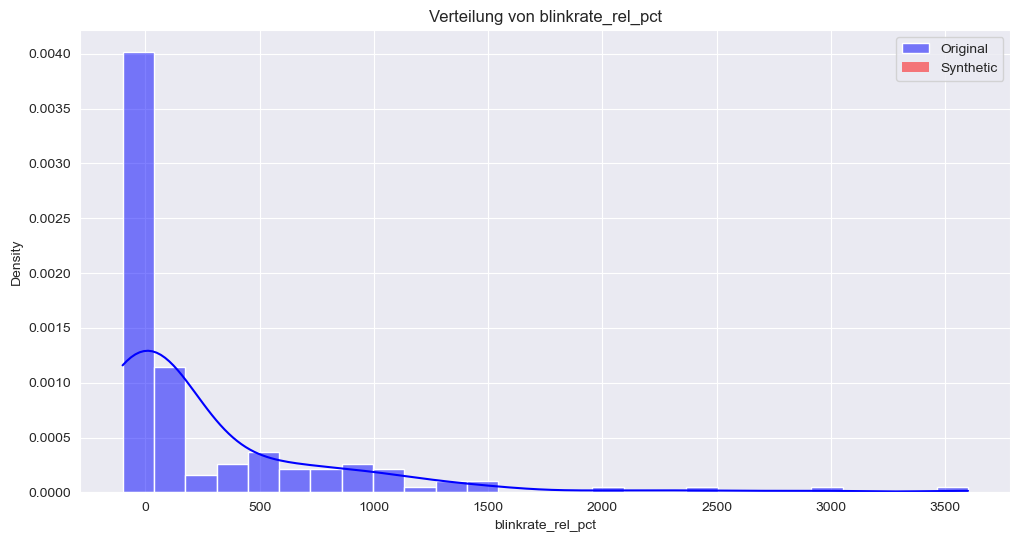

Normalitätstest für blinkrate_rel_pct:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für blinkrate_rel_pct:
Statistik = nan, p-Wert = nan
Die Verteilungen sind signifikant unterschiedlich (Nullhypothese verworfen).



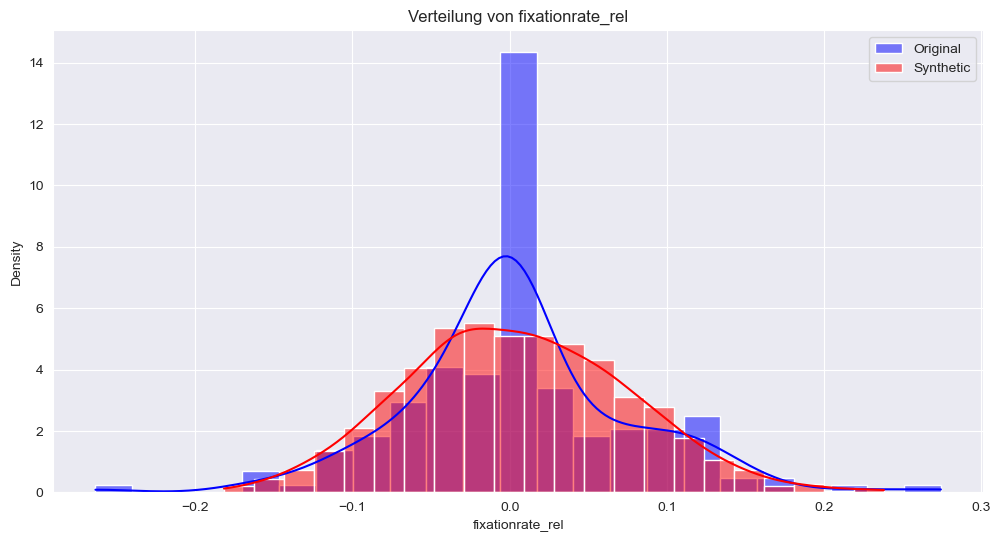

Normalitätstest für fixationrate_rel:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für fixationrate_rel:
Statistik = 0.005705630302165776, p-Wert = 0.9397885556383185
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



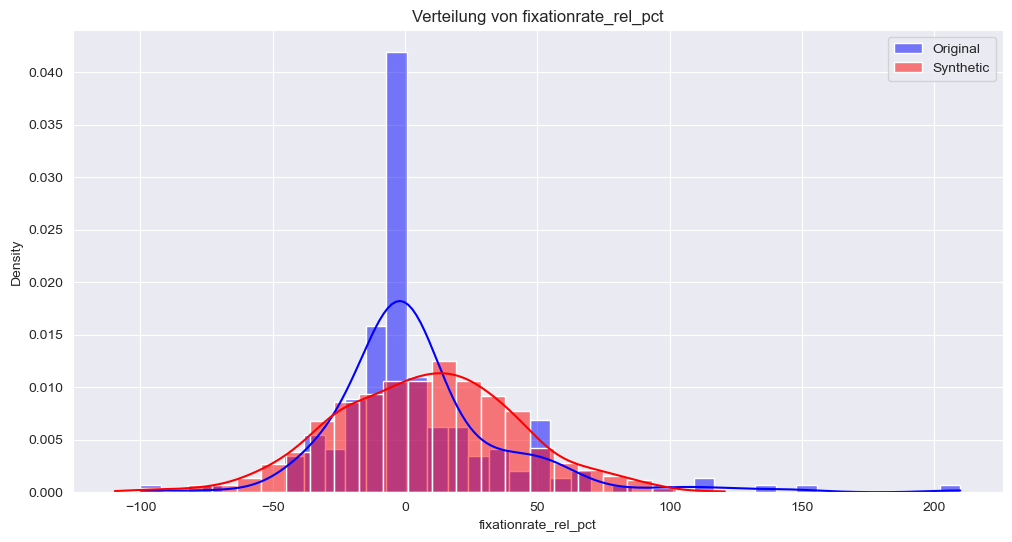

Normalitätstest für fixationrate_rel_pct:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für fixationrate_rel_pct:
Statistik = 4.4497224817337715, p-Wert = 0.03490691897582297
Die Verteilungen sind signifikant unterschiedlich (Nullhypothese verworfen).



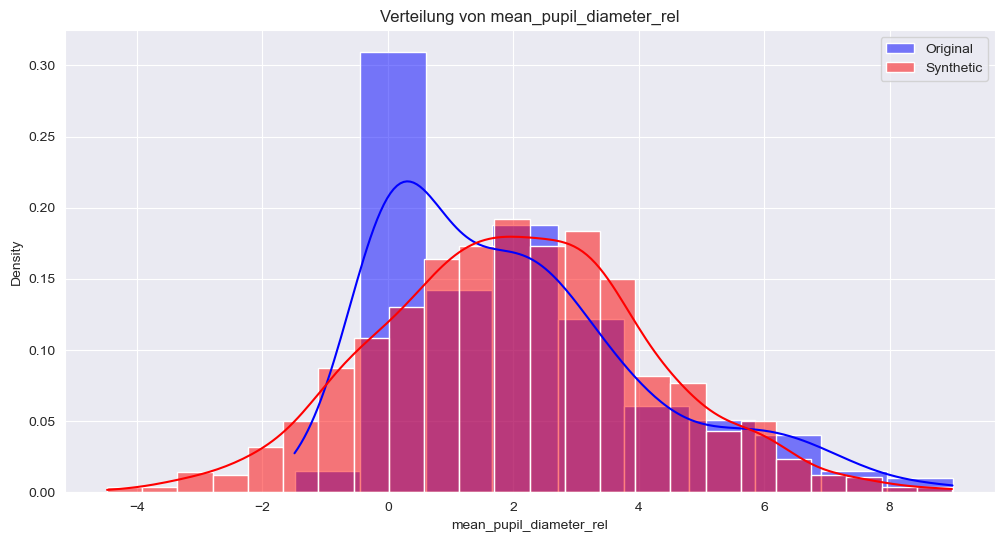

Normalitätstest für mean_pupil_diameter_rel:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mean_pupil_diameter_rel:
Statistik = 1.4780548683595065, p-Wert = 0.22407910433906417
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



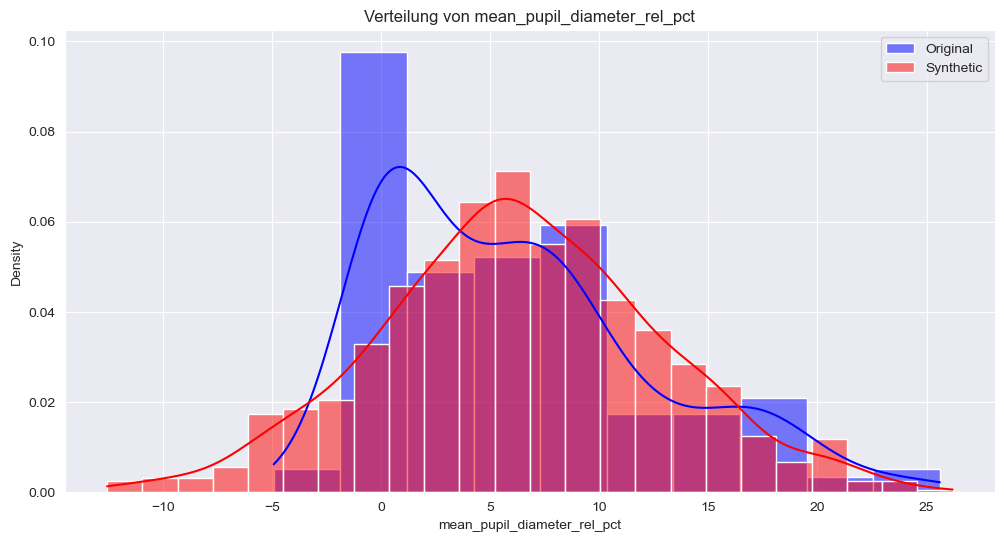

Normalitätstest für mean_pupil_diameter_rel_pct:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mean_pupil_diameter_rel_pct:
Statistik = 2.210713719398862, p-Wert = 0.13705524998217747
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



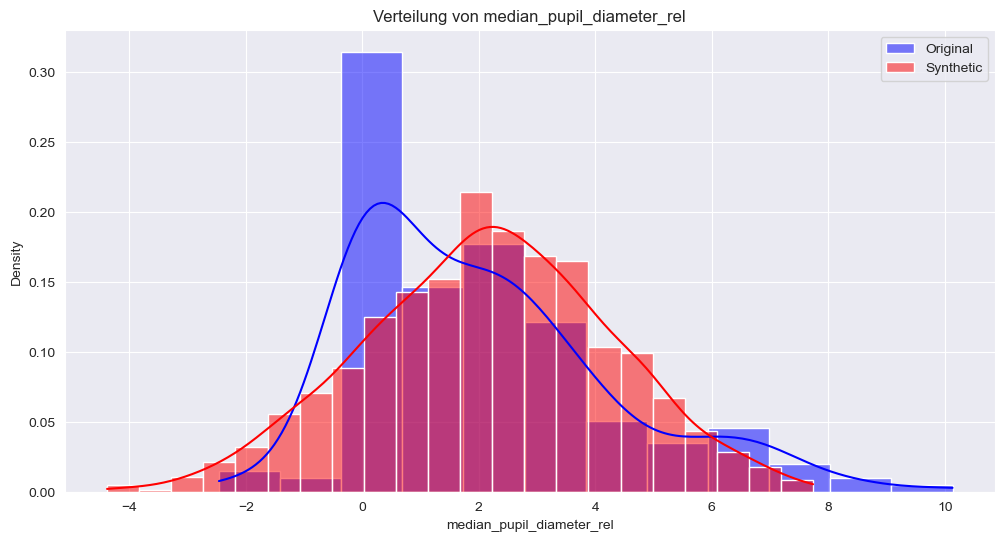

Normalitätstest für median_pupil_diameter_rel:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für median_pupil_diameter_rel:
Statistik = 4.390292841378982, p-Wert = 0.03614410455535336
Die Verteilungen sind signifikant unterschiedlich (Nullhypothese verworfen).



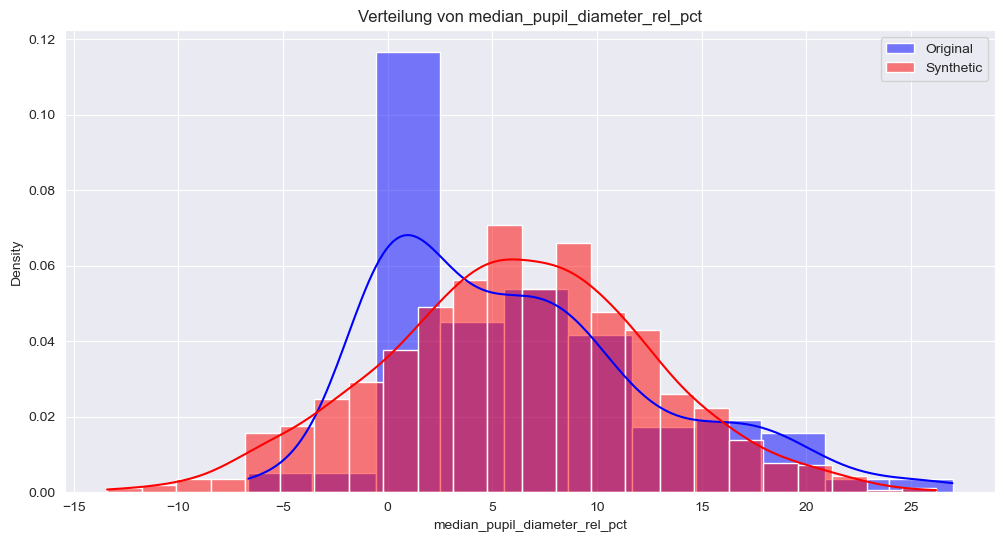

Normalitätstest für median_pupil_diameter_rel_pct:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für median_pupil_diameter_rel_pct:
Statistik = 1.2638921376850427, p-Wert = 0.2609156458204996
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



In [5]:

# Getrennte DataFrames für Original- und generierte Daten
original_df = data.copy()
synthetic_df = augmented_data.iloc[len(data):].copy()

# Werte prüfen. Ausgabe als Plot und Text
Util.data_check.compare_distributions(original_df, synthetic_df)